In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import os

dataset_path = '/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer'
image_extensions = ('.jpg', '.jpeg', '.png')

class_image_counts = {}

for cancer_type in os.listdir(dataset_path):
    cancer_path = os.path.join(dataset_path, cancer_type)
    
    if os.path.isdir(cancer_path):
        total_images = 0
        
        for root, dirs, files in os.walk(cancer_path):
            total_images += sum(
                1 for file in files if file.lower().endswith(image_extensions)
            )
        
        class_image_counts[cancer_type] = total_images
        print(f"{cancer_type}: {total_images} images")


Cervical Cancer: 25000 images
Lung and Colon Cancer: 25000 images
Oral Cancer: 10002 images
ALL: 20000 images
Kidney Cancer: 10000 images
Breast Cancer: 10000 images
Lymphoma: 15000 images
Brain Cancer: 15000 images


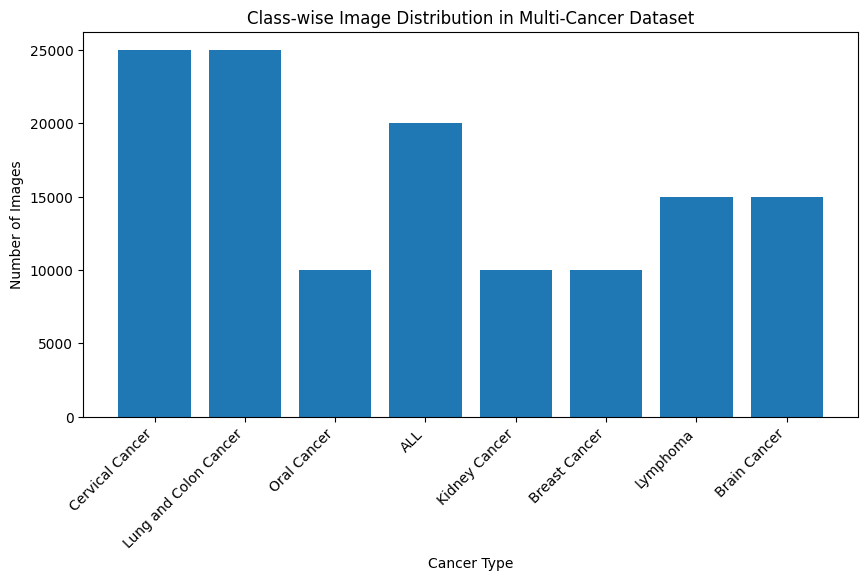

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.title("Class-wise Image Distribution in Multi-Cancer Dataset")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.show()


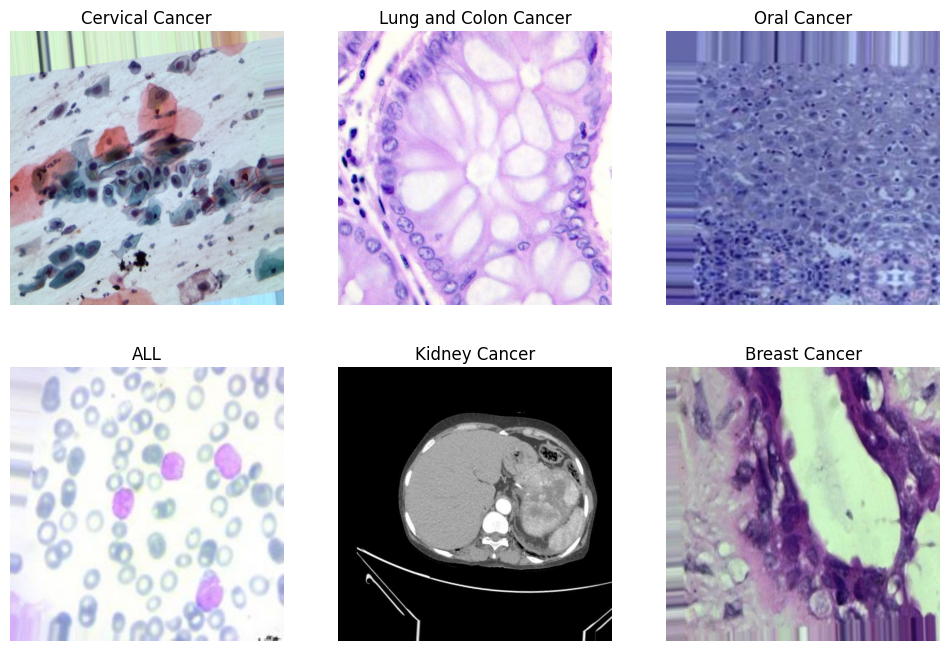

In [8]:
import cv2
import matplotlib.pyplot as plt

samples = []

for cancer_type in os.listdir(dataset_path):
    cancer_path = os.path.join(dataset_path, cancer_type)
    if os.path.isdir(cancer_path):
        for root, dirs, files in os.walk(cancer_path):
            for file in files:
                if file.lower().endswith(image_extensions):
                    samples.append((cancer_type, os.path.join(root, file)))
                    break
            if samples and samples[-1][0] == cancer_type:
                break

plt.figure(figsize=(12,8))
for i, (label, img_path) in enumerate(samples[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.show()


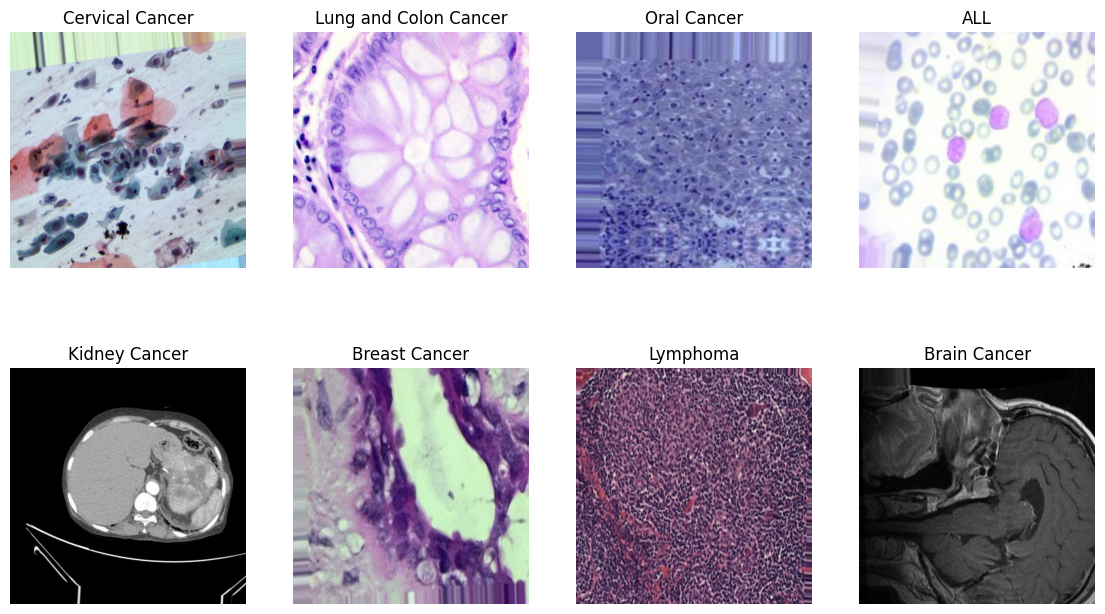

In [9]:
plt.figure(figsize=(14,8))

for i, (label, img_path) in enumerate(samples[:8]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, i+1)   # 2 rows × 4 columns
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.show()


In [11]:
import os
import cv2
import pandas as pd

dataset_path = '/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer'
image_extensions = ('.jpg', '.jpeg', '.png')

image_sizes = []

for cancer_type in os.listdir(dataset_path):
    cancer_path = os.path.join(dataset_path, cancer_type)
    
    if os.path.isdir(cancer_path):
        collected = 0
        
        for root, dirs, files in os.walk(cancer_path):
            for file in files:
                if file.lower().endswith(image_extensions):
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    
                    if img is not None:
                        h, w, c = img.shape
                        image_sizes.append([cancer_type, h, w])
                        collected += 1
                        
                    if collected == 10:  # limit per class
                        break
            if collected == 10:
                break

sizes_df = pd.DataFrame(image_sizes, columns=['Class', 'Height', 'Width'])
sizes_df.head(), sizes_df.describe()


(             Class  Height  Width
 0  Cervical Cancer     512    512
 1  Cervical Cancer     512    512
 2  Cervical Cancer     512    512
 3  Cervical Cancer     512    512
 4  Cervical Cancer     512    512,
        Height  Width
 count    80.0   80.0
 mean    512.0  512.0
 std       0.0    0.0
 min     512.0  512.0
 25%     512.0  512.0
 50%     512.0  512.0
 75%     512.0  512.0
 max     512.0  512.0)

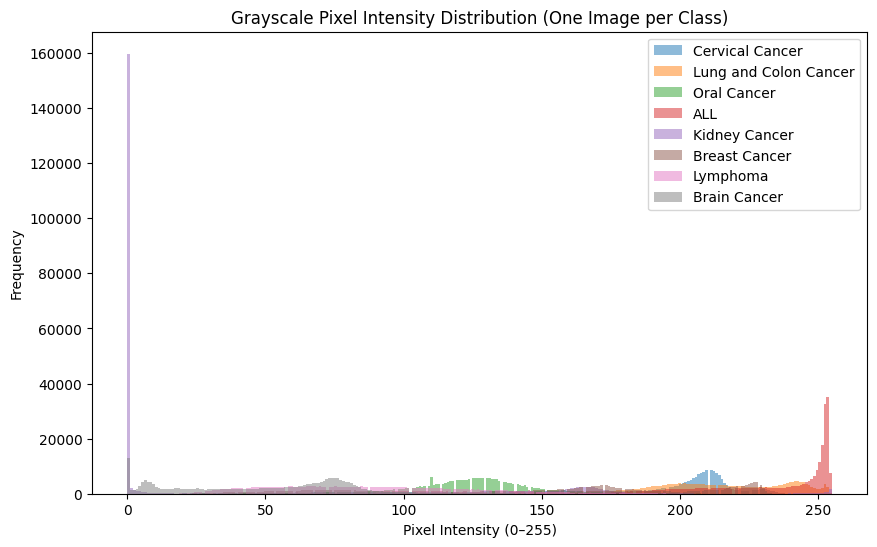

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_path = '/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer'
image_extensions = ('.jpg', '.jpeg', '.png')

plt.figure(figsize=(10,6))

for cancer_type in os.listdir(dataset_path):
    cancer_path = os.path.join(dataset_path, cancer_type)
    
    if os.path.isdir(cancer_path):
        image_found = False
        
        for root, dirs, files in os.walk(cancer_path):
            for file in files:
                if file.lower().endswith(image_extensions):
                    img_path = os.path.join(root, file)
                    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    
                    if img_gray is not None:
                        plt.hist(
                            img_gray.ravel(),
                            bins=256,
                            alpha=0.5,
                            label=cancer_type
                        )
                        image_found = True
                        break
            if image_found:
                break

plt.title("Grayscale Pixel Intensity Distribution (One Image per Class)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [1]:
import os

dataset_path = '/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer'

for cancer_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, cancer_class)
    
    if os.path.isdir(class_path):
        subclasses = [
            name for name in os.listdir(class_path)
            if os.path.isdir(os.path.join(class_path, name))
        ]
        print(f"{cancer_class}: {len(subclasses)} subclasses -> {subclasses}")


Cervical Cancer: 5 subclasses -> ['cervix_koc', 'cervix_dyk', 'cervix_pab', 'cervix_sfi', 'cervix_mep']
Lung and Colon Cancer: 5 subclasses -> ['colon_bnt', 'colon_aca', 'lung_aca', 'lung_bnt', 'lung_scc']
Oral Cancer: 2 subclasses -> ['oral_scc', 'oral_normal']
ALL: 4 subclasses -> ['all_pro', 'all_benign', 'all_early', 'all_pre']
Kidney Cancer: 2 subclasses -> ['kidney_tumor', 'kidney_normal']
Breast Cancer: 2 subclasses -> ['breast_benign', 'breast_malignant']
Lymphoma: 3 subclasses -> ['lymph_fl', 'lymph_cll', 'lymph_mcl']
Brain Cancer: 3 subclasses -> ['brain_tumor', 'brain_glioma', 'brain_menin']
